Project: Predicting Student Performance Using Machine Learning (Linear regression)

Data Link: https://archive.ics.uci.edu/dataset/320/student+performance

Part 1: Data Preprocessing

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Read the student-mat.csv dataset and assign it to a variable called mat.
mat = pd.read_csv('student-mat.csv')
print(mat.head(10))

  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                            

1/ Prepare and clean Data

In [3]:
# Organize data in a table (DataFrame)
# Split the first column of variable mat into a list called column name column_names and create dataframe called mat_df and 
column_names = mat.columns[0].split(';')
print(column_names)
mat_df = pd.DataFrame(columns=column_names)
# Import values relative to each student and insert in mat_df (rows)
for row in mat.iloc[1:].iterrows():
    row_values = [value.strip('"') for value in row[1][0].split(';')] # Extract the values from each row
    mat_df = mat_df.append(dict(zip(column_names, row_values)), ignore_index=True) # The ignore_index=True argument ensures that the index is updated sequentially for each appended row.

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


C:\Users\X1\AppData\Local\Temp\ipykernel_15196\2980485784.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mat_df = mat_df.append(dict(zip(column_names, row_values)), ignore_index=True) # The ignore_index=True argument ensures that the index is updated sequentially for each appended row.
C:\Users\X1\AppData\Local\Temp\ipykernel_15196\2980485784.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mat_df = mat_df.append(dict(zip(column_names, row_values)), ignore_index=True) # The ignore_index=True argument ensures that the index is updated sequentially for each appended row.
C:\Users\X1\AppData\Local\Temp\ipykernel_15196\2980485784.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mat_df = mat_df.append(dict(zip(column_

In [4]:
# print the ten first rows of mat_df
mat_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
2,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
3,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
5,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
6,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
7,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
8,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
9,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9


In [5]:
# Print infomation about mat_df
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      394 non-null    object
 1   sex         394 non-null    object
 2   age         394 non-null    object
 3   address     394 non-null    object
 4   famsize     394 non-null    object
 5   Pstatus     394 non-null    object
 6   Medu        394 non-null    object
 7   Fedu        394 non-null    object
 8   Mjob        394 non-null    object
 9   Fjob        394 non-null    object
 10  reason      394 non-null    object
 11  guardian    394 non-null    object
 12  traveltime  394 non-null    object
 13  studytime   394 non-null    object
 14  failures    394 non-null    object
 15  schoolsup   394 non-null    object
 16  famsup      394 non-null    object
 17  paid        394 non-null    object
 18  activities  394 non-null    object
 19  nursery     394 non-null    object
 20  higher    

In [6]:
# Change the type of each variable
column_types = {
    'school': 'category',
    'sex': 'category',
    'age': 'float64',
    'address': 'category',
    'famsize': 'category',
    'Pstatus': 'category',
    'Medu': 'category',
    'Fedu': 'category',
    'Mjob': 'category',
    'Fjob': 'category',
    'reason': 'category',
    'guardian': 'category',
    'traveltime': 'category',
    'studytime': 'category',
    'failures': 'category',
    'schoolsup': 'category',
    'famsup': 'category',
    'paid': 'category',
    'activities': 'category',
    'nursery': 'category',
    'higher': 'category',
    'internet': 'category',
    'romantic': 'category',
    'famrel': 'int64',
    'freetime': 'int64',
    'goout': 'int64',
    'Dalc': 'int64',
    'Walc': 'int64',
    'health': 'int64',
    'absences': 'int64',
    'G1': 'float64',
    'G2': 'float64',
    'G3': 'float64'
}
mat_df = mat_df.astype(column_types)
numeric_columns = ['age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
mat_df[numeric_columns] = mat_df[numeric_columns].apply(pd.to_numeric, errors='coerce')                       

In [7]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      394 non-null    category
 1   sex         394 non-null    category
 2   age         394 non-null    float64 
 3   address     394 non-null    category
 4   famsize     394 non-null    category
 5   Pstatus     394 non-null    category
 6   Medu        394 non-null    category
 7   Fedu        394 non-null    category
 8   Mjob        394 non-null    category
 9   Fjob        394 non-null    category
 10  reason      394 non-null    category
 11  guardian    394 non-null    category
 12  traveltime  394 non-null    category
 13  studytime   394 non-null    category
 14  failures    394 non-null    category
 15  schoolsup   394 non-null    category
 16  famsup      394 non-null    category
 17  paid        394 non-null    category
 18  activities  394 non-null    category
 19  nursery 

In [8]:
# Print number of rows and columns
mat_df.shape

(394, 33)

The dataset contains 394 rows and 33 columns.

In [9]:
#Change names of columns
mat_df.rename(columns={'school': 'School', 
                   'sex' : 'Sex', 
                   'age': 'Age', 
                   'address' : 'Address',
                   'famsize': 'Family Size',
                   'Pstatus': 'Parent Cohabitation Status',
                   'Medu': 'Mother Education',
                   'Fedu': 'Father Education',
                   'Mjob': 'Mother Job',
                   'Fjob': 'Father Job',
                   'reason' : 'Reason',
                   'guardian' : 'Guardian',
                   'traveltime': 'Travel Time',
                   'studytime': 'Study Time',
                   'failures' : 'Failures',
                   'schoolsup': 'Extra Educational Support',
                   'famsup': 'Family Educational Support',
                   'paid': 'Extra Paid Course',
                   'activities': 'Extra-curricular Activities',
                   'nursery': 'Attending Nursery School',
                   'higher': 'Wants To Take Higher Ed',
                   'internet': 'Internet Access',
                   'romantic': 'Romantic Relationship',
                   'famrel': 'Family Relationship',
                   'freetime': 'Free Time After School',
                   'goout': 'Going Out With Friends',
                   'Dalc': 'Workday Alcohol Consumption',
                   'Walc': 'Weekend Alcohol Consumption',
                   'health': 'Current Health Status',
                   'absences': 'Number of School Absences',
                   'G1': 'G1',
                   'G2': 'G2',
                   'G3': 'G3'}, inplace=True)

In [10]:
#Print new column names
mat_df.columns

Index(['School', 'Sex', 'Age', 'Address', 'Family Size',
       'Parent Cohabitation Status', 'Mother Education', 'Father Education',
       'Mother Job', 'Father Job', 'Reason', 'Guardian', 'Travel Time',
       'Study Time', 'Failures', 'Extra Educational Support',
       'Family Educational Support', 'Extra Paid Course',
       'Extra-curricular Activities', 'Attending Nursery School',
       'Wants To Take Higher Ed', 'Internet Access', 'Romantic Relationship',
       'Family Relationship', 'Free Time After School',
       'Going Out With Friends', 'Workday Alcohol Consumption',
       'Weekend Alcohol Consumption', 'Current Health Status',
       'Number of School Absences', 'G1', 'G2', 'G3'],
      dtype='object')

Renaming columns with more descriptive and intuitive  names that are easier to understand and work with, can improve the readability and clarity of the dataset, making it easier for data analysts and researchers to interpret and analyze the data.

By providing meaningful and descriptive names to the columns, it becomes easier to identify and refer to specific variables or attributes of the dataset. This can enhance the overall usability of the data and facilitate more efficient data analysis and exploration.

In [11]:
# Check missing values
mat_df.isna().sum()

School                         0
Sex                            0
Age                            0
Address                        0
Family Size                    0
Parent Cohabitation Status     0
Mother Education               0
Father Education               0
Mother Job                     0
Father Job                     0
Reason                         0
Guardian                       0
Travel Time                    0
Study Time                     0
Failures                       0
Extra Educational Support      0
Family Educational Support     0
Extra Paid Course              0
Extra-curricular Activities    0
Attending Nursery School       0
Wants To Take Higher Ed        0
Internet Access                0
Romantic Relationship          0
Family Relationship            0
Free Time After School         0
Going Out With Friends         0
Workday Alcohol Consumption    0
Weekend Alcohol Consumption    0
Current Health Status          0
Number of School Absences      0
G1        

Our data is complete.There are no missing values in our data.

In [12]:
# Generate a summary of the statistical properties of mat_df
mat_df.describe()

,Age,Family Relationship,Free Time After School,Going Out With Friends,Workday Alcohol Consumption,Weekend Alcohol Consumption,Current Health Status,Number of School Absences,G1,G2,G3
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,16.692893,3.944162,3.236041,3.106599,1.482234,2.294416,3.555838,5.708122,10.923858,10.725888,10.426396
std,1.275967,0.897794,1.000061,1.113785,0.891543,1.287884,1.391789,8.013258,3.309988,3.758754,4.581844
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


The dataset contains information about 394 students with ages ranging from 15 to 22 years old. The age distribution shows that 25% of the students are 16 years old or younger, while 50% of the students fall within the age range of 17 to 18 years old, and 75% of the students are 18 years old or younger, indicating that the majority of the students are relatively young.

Their final grades (G3) range from 0 to 20, with 25% of the students achieving a final grade of 8 or below. The median grade (50th percentile) is 11, indicating that half of the students scored 11 or above in their final exams. Moreover, 75% of the students attained a final grade of 14 or below, highlighting that a significant portion of the students scored relatively lower grades.

From the minimum and maximum values of all columns in the dataset, we can conclude that there are no outliers present. An outlier is an extreme value that significantly deviates from the rest of the data points and can potentially distort statistical analysis or modeling. Since the minimum and maximum fall within the expected range for all attributes, it suggests that all values are valid and plausible within the context of the column's grading scale. 

The absence of outliers in dataset provides greater confidence in the dataset's integrity and allows for more accurate interpretations of student performance without the influence of extreme and potentially erroneous values.

Part 2: Data Analysis

In [13]:
mat_df['School'].value_counts()

GP    348
MS     46
Name: School, dtype: int64

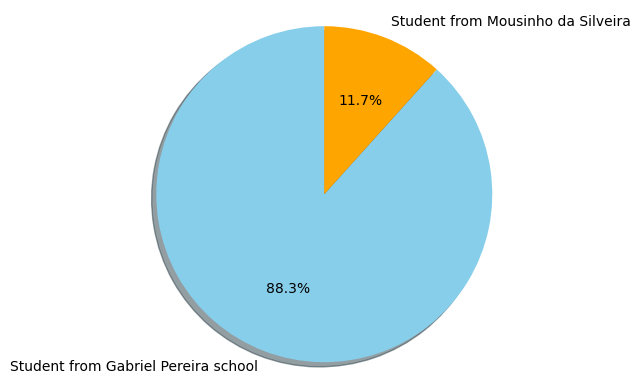

In [14]:
labels = 'Student from Gabriel Pereira school', 'Student from Mousinho da Silveira'
sizes = [348, 46]
colors=['skyblue','orange']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal ensures that pie is drawn as a circle.
plt.show()

More than 88% of the students are from Gabriel Pereira (GP) school.

In [15]:
mat_df['Sex'].value_counts()

F    207
M    187
Name: Sex, dtype: int64

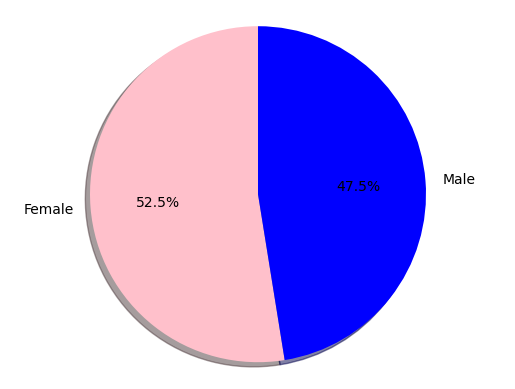

In [16]:
labels = 'Female', 'Male'
sizes = [207, 187]
colors=['pink','blue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal ensures that pie is drawn as a circle.
plt.show()

The gender distribution in the dataset appears to be relatively balanced, with a slight difference in the number of female and male students. Approximately 52.5% of the students are female, while about 47.5% are male. 

This relatively equitable distribution suggests that the dataset represents a fair representation of both genders. 

The small difference in percentages indicates that neither gender significantly dominates the dataset, which can be important for conducting unbiased analyses.

In [17]:
mat_df['Address'].value_counts()

U    306
R     88
Name: Address, dtype: int64

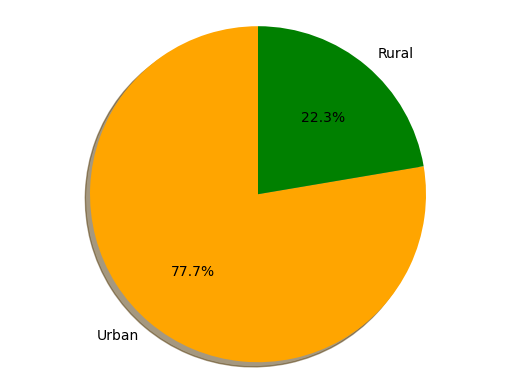

In [18]:
labels = 'Urban', 'Rural'
sizes = [306, 88]
colors=['orange','green']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')  # Equal ensures that pie is drawn as a circle.
plt.show()

More than two-thirds of the students are from urban areas.

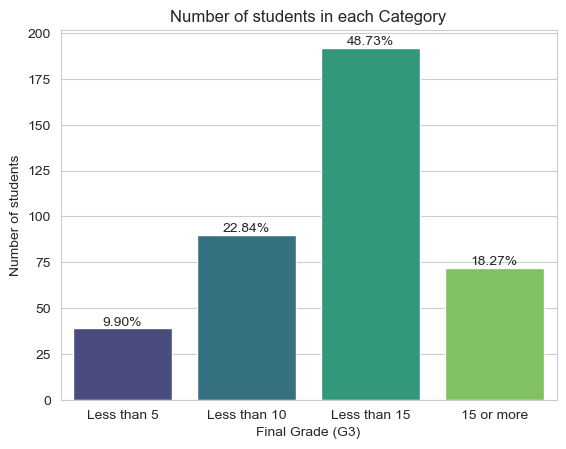

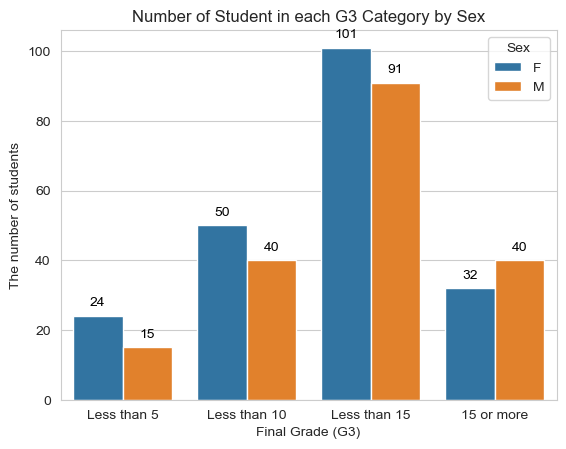

In [19]:
# Create categories
categories = ['Less than 5', 'Less than 10', 'Less than 15', '15 or more']
cut_points = [0, 5, 10, 15, 20]
sns.set_style("whitegrid")
mat_df['G3_category'] = pd.cut(mat_df['G3'], bins=cut_points, labels=categories, right=False)
#Plot number of student in each G3 grade category
sns.countplot(x='G3_category', data=mat_df, palette='viridis')
    
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of students')
plt.title('Number of students in each Category')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of students')
plt.title('Number of students in each Category')

for index, value in enumerate(mat_df['G3_category'].value_counts().sort_index()):
    percentage = (value/394)*100
    plt.text(index, value,'{:.2f}%'.format(percentage), ha='center', va='bottom')

plt.show()
#Plot number of student in each G3 grade category by Sex
sns.countplot(x='G3_category', hue='Sex', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Final Grade (G3)')
plt.ylabel('The number of students')
plt.title('Number of Student in each G3 Category by Sex')
plt.show()

I choose to divide the final grade (G3) into four categories: 
"Less than 5", "Less than 10", "Less than 15" and "15 or more".

In the category "Less than 5" 9.9% of students fall, comprising 24 females and 15 males. 
Moving to the category "Less than 10" the percentage increases to 22.84%, with 50 female and 40 male students. 

The largest group, "Less than 15" encompasses 48.73% of students, with 101 females and 91 males.

Finally, the "15 or more" category represents 18.27% of students, with 32 females and 40 males.

Across all G3 categories, it is evident that there is a consistent difference of approximately 10 students between the number of female and male students. 

The dataset indicates that the gender distribution remains relatively equitable across the different G3 categories, with neither gender significantly dominating in any particular grade range.

In [20]:
mat_df['Family Size'].value_counts()

GT3    280
LE3    114
Name: Family Size, dtype: int64

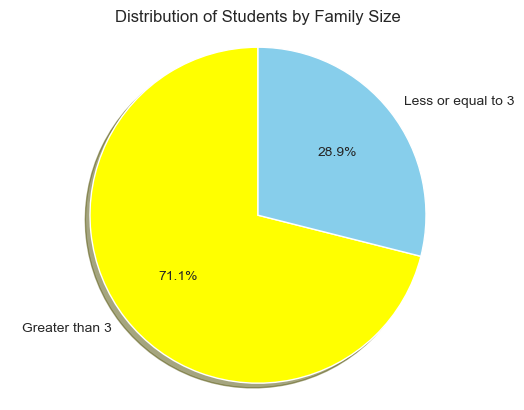

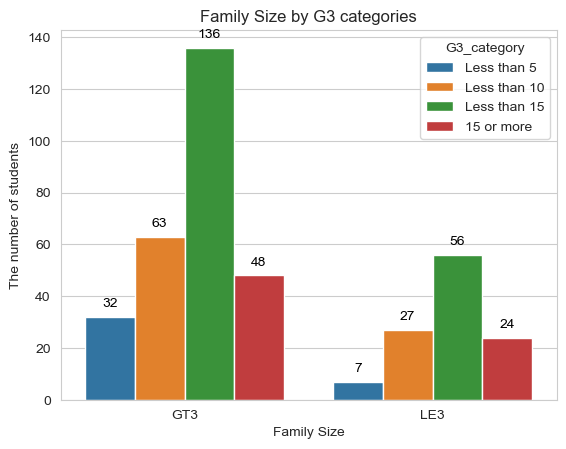

In [21]:
labels = 'Greater than 3', 'Less or equal to 3'
sizes = [280, 114]
colors=['yellow','skyblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')# Equal ensures that pie is drawn as a circle.
plt.title('Distribution of Students by Family Size')
plt.show()

#Plot number of student in each G3 grade category by Family Size
sns.countplot(hue='G3_category', x='Family Size', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Family Size')
plt.ylabel('The number of students')
plt.title('Family Size by G3 categories')
plt.show()


From the figures above, we observe that the majority of students (71.1%) come from families with more than three members (GT3 category). Within this category, the distribution of students across the G3 grade categories is as follows: 32 students in the "Less than 5" range, 63 students in "Less than 10," 136 students in "Less than 15," and 48 students with a final grade of "15 or more." 

On the other hand, 28.8% of students come from families with three or fewer members (LE3 category). In this group, the distribution of students across the G3 grade categories is as follows: 7 students in "Less than 5," 27 students in "Less than 10," 56 students in "Less than 15," and 24 students with a final grade of "15 or more."

Remarkably, the structure of distribution across G3 categories is quite similar in both family size categories. The difference in the number of students in each G3 category is primarily due to the proportion of students from each family size category. 

Despite the difference in family size, the data suggests that family size does not significantly impact the final grade (G3) of the students.

In [22]:
mat_df['Parent Cohabitation Status'].value_counts()

T    354
A     40
Name: Parent Cohabitation Status, dtype: int64

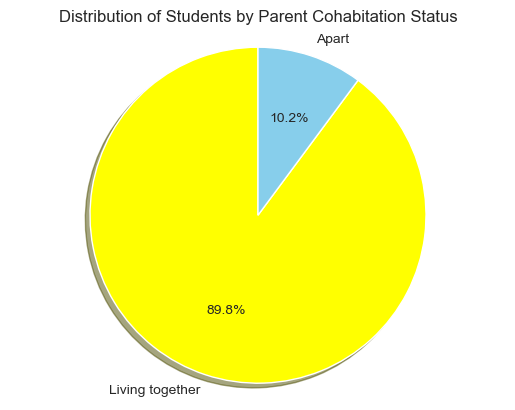

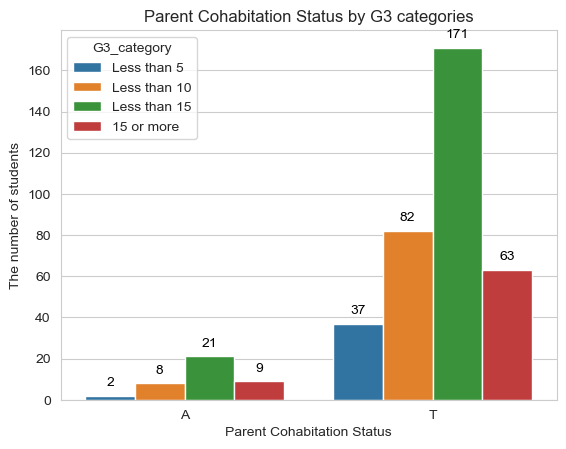

In [23]:
# Checking The Parent Cohabitation Status Column
labels = 'Living together', 'Apart'
sizes = [354, 40]
colors=['yellow','skyblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')# Equal ensures that pie is drawn as a circle.
plt.title('Distribution of Students by Parent Cohabitation Status')
plt.show()

#Plot number of student in each G3 grade category by Parent Cohabitation Status
sns.countplot(hue='G3_category', x='Parent Cohabitation Status', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Parent Cohabitation Status')
plt.ylabel('The number of students')
plt.title('Parent Cohabitation Status by G3 categories')
plt.show()

From the figures above, we observe that the majority of students (89.8%) live with both parents.

Remarkably, the distribution structure in the G3 categories is quite similar among students whose parents live together and those whose parents live apart.
Thus, the cohabitation status of the parents has no significant impact on the students' final mark (G3).

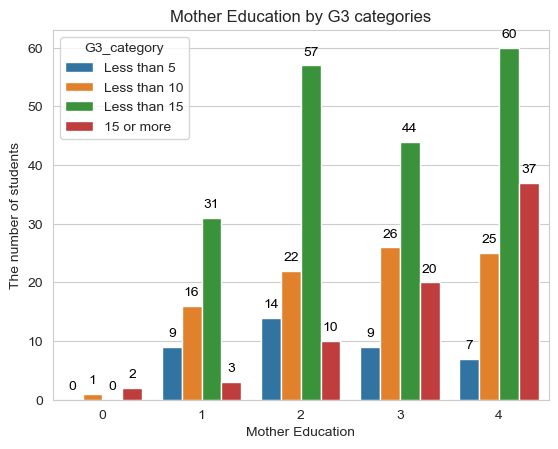

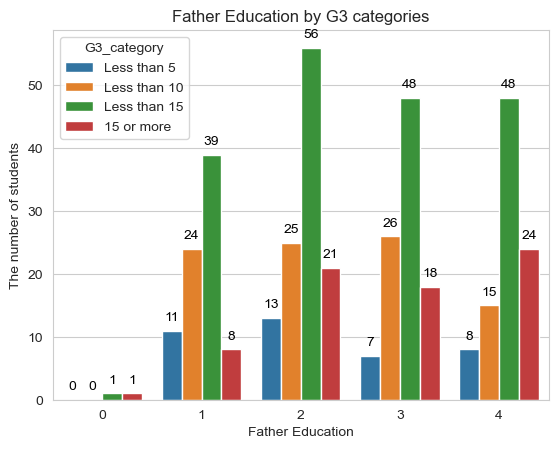

In [24]:
# Checking The Mother Education Column
sns.countplot(hue='G3_category', x='Mother Education', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Mother Education')
plt.ylabel('The number of students')
plt.title('Mother Education by G3 categories')
plt.show()

# Checking The Father Education Column
sns.countplot(hue='G3_category', x='Father Education', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Father Education')
plt.ylabel('The number of students')
plt.title('Father Education by G3 categories')
plt.show()

From the figures presented above, regardless of the level of parental education, it is evident that a significant proportion of students achieve final grades of less than 15. 

The distribution structure appears to be quite similar across all levels of parental education. However, a notable trend emerges when considering the final grades of 15 or more. Notably, the number of students achieving such high grades increases significantly with higher levels of maternal education.

This pattern holds true for both maternal and paternal education levels. When the parental education level is equal to or greater than 2 (indicating completion of 5th to 9th grade), the likelihood of students obtaining final grades of 15 or more becomes more pronounced. 

This trend suggests that higher levels of parental education may positively influence a student's academic performance, leading to an increased likelihood of achieving exceptional grades.

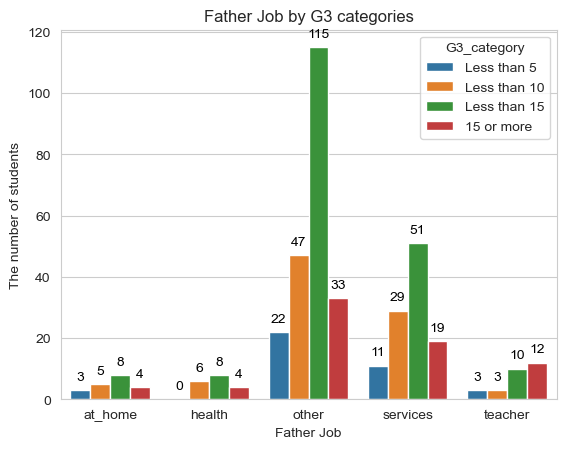

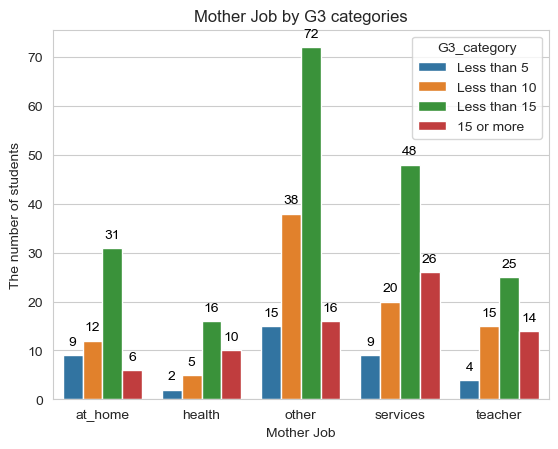

In [25]:
# Checking The Father Job Column
sns.countplot(hue='G3_category', x='Father Job', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Father Job')
plt.ylabel('The number of students')
plt.title('Father Job by G3 categories')
plt.show()

# Checking The Mother Job Column
sns.countplot(hue='G3_category', x='Mother Job', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Mother Job')
plt.ylabel('The number of students')
plt.title('Mother Job by G3 categories')
plt.show()

Based on the figures, the distribution structure of students across the G3 categories appears quite similar among different categories of the mother's job. However, the pattern differs significantly when considering the father's job. Specifically, for students whose fathers are teachers, the number of students achieving a final grade of 15 or more is higher compared to other G3 categories. 

Additionally, for students whose parents work in the health sector, no student obtains a final grade less than 5. On the other hand, when fathers work in the service or other job sectors, the majority of students achieve final grades of less than 15.

These findings suggest that the father's job has a significant impact on students' final marks (G3), as evident from the varying distribution patterns across G3 categories based on paternal occupation. Conversely, the mother's job seems to have no discernible impact on students' final grades, given the similar distribution structure observed across different G3 categories in relation to maternal occupation. 

These trends imply that the father's job may play a more influential role in influencing students' academic performance, while the mother's job appears to be less influential in this regard. 

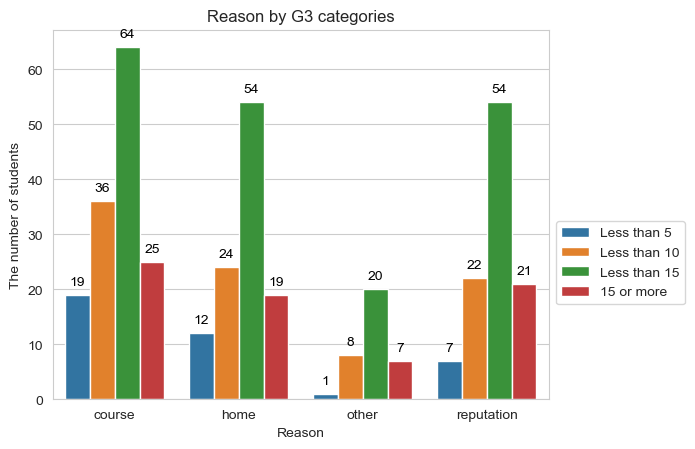

In [26]:
# Checking The Reason Column
sns.countplot(hue='G3_category', x='Reason', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Reason')
plt.ylabel('The number of students')
plt.title('Reason by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

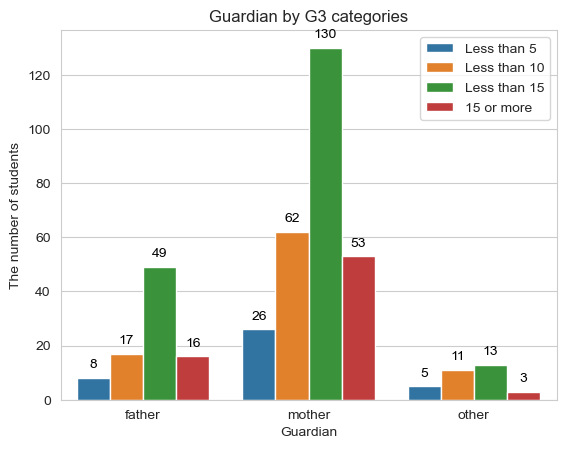

In [27]:
# Checking The Guardian Column
sns.countplot(hue='G3_category', x='Guardian', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Guardian')
plt.ylabel('The number of students')
plt.title('Guardian by G3 categories')
plt.legend()
plt.show()

The distribution structure of students across G3 (final grade) categories appearing quite similar among different categories of guardians and reasons for choosing school suggest that these factors may have limited direct impact on students' academic performance.

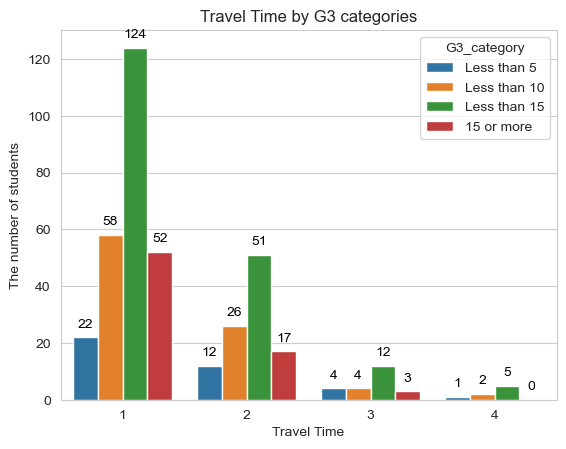

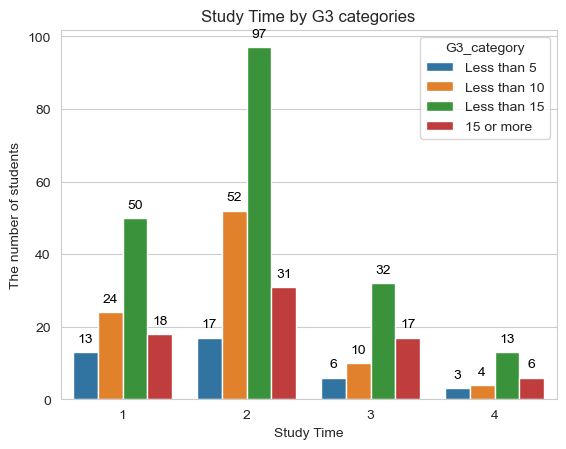

In [28]:
# Checking The Travel Time Column
sns.countplot(hue='G3_category', x='Travel Time', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Travel Time')
plt.ylabel('The number of students')
plt.title('Travel Time by G3 categories')
plt.show()
# Checking Study Time 
sns.countplot(hue='G3_category', x='Study Time', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Study Time')
plt.ylabel('The number of students')
plt.title('Study Time by G3 categories')
plt.show()

For travel time, the distribution of students who spend less than 15 minutes and between 15 to 30 minutes is quite similar across grade categories. However, for those who spend more than 1 hour traveling, no student achieves a final grade of "15 or more." This observation suggests that longer travel times may be associated with lower academic performance, possibly due to challenges in regular school attendance.

Regarding study time, students who invest more time in studying (less than 2 hours and between 2 and 5 hours) exhibit similar distributions across grade categories. However, as study time increases beyond 5 hours, we notice a higher representation in the "15 or more" G3 category. This finding suggests that dedicating more time to studying may positively influence final grades.

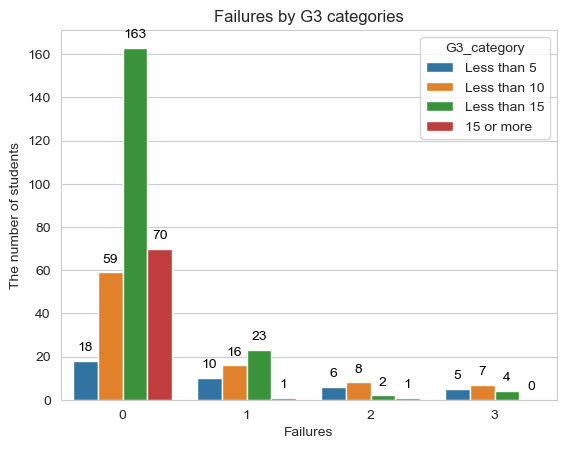

In [29]:
# Checking The Failures Column
sns.countplot(hue='G3_category', x='Failures', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Failures')
plt.ylabel('The number of students')
plt.title('Failures by G3 categories')
plt.show()

The data on the impact of failure in achieved grades presents a clear pattern. The number of students in each grade category varies significantly based on the number of past class failures they have.

For students with no past class failures (Failure = 0), the distribution across grade categories shows a relatively large number of students achieving high grades. Specifically, there are " 163 in "Less than 15," and 70 in "15 or more." This suggests that students with no history of failure tend to perform well and achieve higher final grades.

As the number of past class failures increases, the number of students achieving higher grades gradually declines. For students with one past failure (Failure = 1), in the "15 or more" grade category, the number of students significantly drops to only 1.

For students with two past failures (Failure = 2), the number of students achieving higher grades further reduces. 

Finally, for students with three past failures (Failure = 3), the number of students in higher grade categories diminishes to the point where no students achieve a final grade of "15 or more."

These trends indicate a strong negative impact of past class failures on achieved grades. As the number of failures increases, the likelihood of achieving higher grades diminishes significantly.

In [30]:
mat_df['Extra Educational Support'].value_counts()

no     344
yes     50
Name: Extra Educational Support, dtype: int64

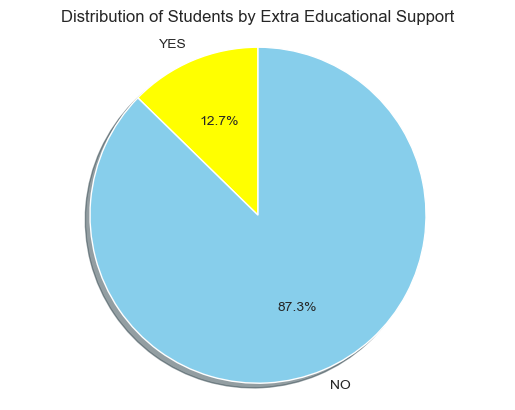

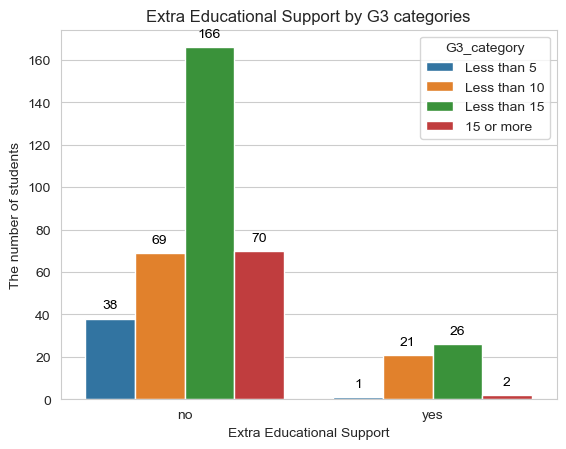

In [31]:
# Checking The Extra Educational Support Column
labels = 'YES', 'NO'
sizes = [50, 344]
colors=['yellow','skyblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')# Equal ensures that pie is drawn as a circle.
plt.title('Distribution of Students by Extra Educational Support')
plt.show()

#Plot number of student in each G3 grade category by Extra Educational Support
sns.countplot(hue='G3_category', x='Extra Educational Support', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Extra Educational Support')
plt.ylabel('The number of students')
plt.title('Extra Educational Support by G3 categories')
plt.show()

The majority of students, approximately 87.3%, do not receive extra educational support. Among this group, we can observe a relatively higher number of students achieving higher grades. Specifically, there are  166 students in "Less than 15," and 70 students in "15 or more." This suggests that a significant proportion of students who do not receive extra educational support are still able to achieve satisfactory or higher grades.

On the other hand, only about 12.7% of students receive extra educational support. Among this smaller group, the number of students achieving higher grades is relatively lower. There is only 1 student in the "Less than 5" grade category, 21 students in "Less than 10," 26 students in "Less than 15," and only 2 students in the "15 or more" grade category.

The data show that students who receive extra educational supportare less represented in higher grade groups than students who do not have such support. This indicates that the extra educational support given did not have a significant effect on achieving a higher score.

In [32]:
mat_df['Family Educational Support'].value_counts()

yes    242
no     152
Name: Family Educational Support, dtype: int64

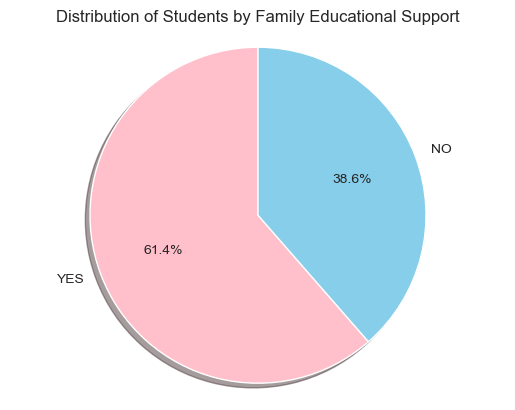

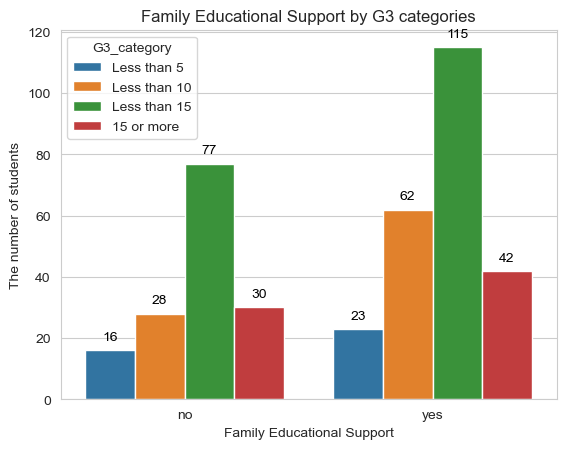

In [33]:
# Checking The Family Educational Support Column
labels = 'YES', 'NO'
sizes = [242, 152]
colors=['pink','skyblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')# Equal ensures that pie is drawn as a circle.
plt.title('Distribution of Students by Family Educational Support')
plt.show()

#Plot number of student in each G3 grade category by Extra Educational Support
sns.countplot(hue='G3_category', x='Family Educational Support', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Family Educational Support')
plt.ylabel('The number of students')
plt.title('Family Educational Support by G3 categories')
plt.show()

The data on the impact of family educational support on student grades indicates that the distribution structure of students across the G3 categories (Less than 5, Less than 15, and 15 or more) appears quite similar for both groups that receive and do not receive family educational support.

Although the overall distribution structure is similar, there is a notable difference in the "Less than 10" grade category. Students who receive family educational support have a slightly higher representation in the "Less than 10" grade category compared to those who do not receive such support.

In conclusion, while the distribution of students across G3 categories is generally similar for both groups, The data does not establish a direct causal relationship between family educational support and grades.

In [34]:
mat_df['Extra Paid Course'].value_counts()

no     213
yes    181
Name: Extra Paid Course, dtype: int64

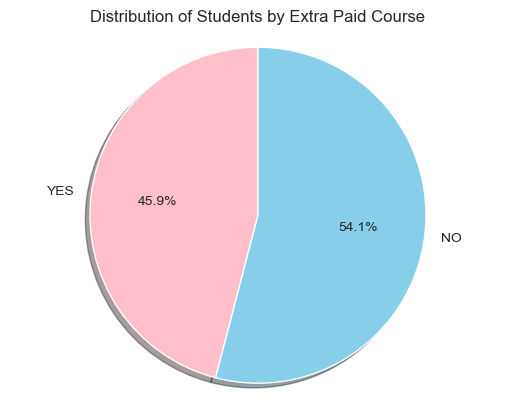

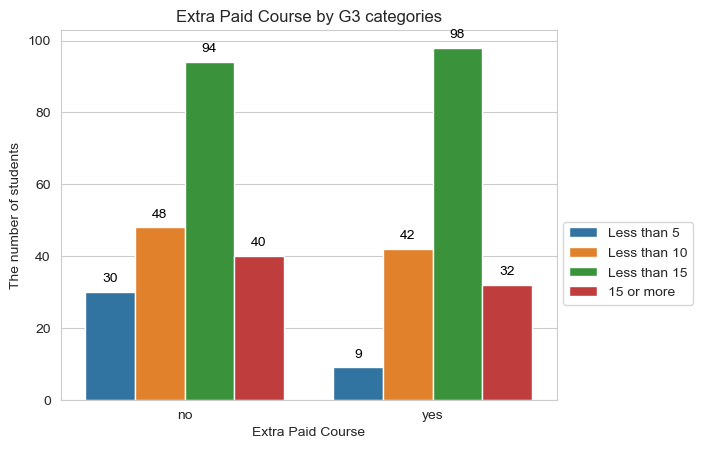

In [35]:
# Checking The Extra Paid Course Column
labels = 'YES', 'NO'
sizes = [181, 213]
colors=['pink','skyblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')# Equal ensures that pie is drawn as a circle.
plt.title('Distribution of Students by Extra Paid Course')
plt.show()

#Plot number of student in each G3 grade category by Extra Educational Support
sns.countplot(hue='G3_category', x='Extra Paid Course', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Extra Paid Course')
plt.ylabel('The number of students')
plt.title('Extra Paid Course by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The data on the impact of Extra paid course on student grades indicates that the distribution structure of students across all G3 categories appears quite similar for both the in- and non- Extra paid course.
The data does not establish a direct causal relationship between taken Extra paid course and grades.

In [36]:
mat_df['Extra-curricular Activities'].value_counts()

yes    201
no     193
Name: Extra-curricular Activities, dtype: int64

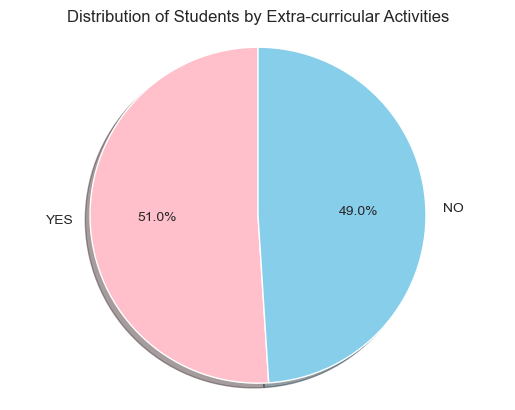

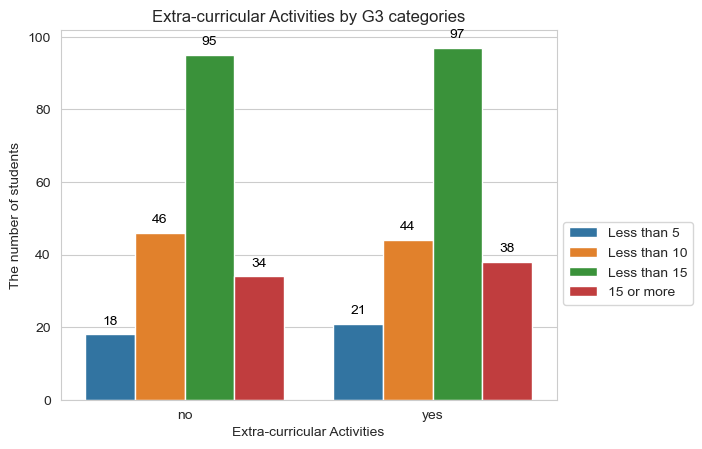

In [37]:
# Checking The  Extra-curricular Activities Column
labels = 'YES', 'NO'
sizes = [201, 193]
colors=['pink','skyblue']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors, shadow=True, startangle=90)
ax1.axis('equal')# Equal ensures that pie is drawn as a circle.
plt.title('Distribution of Students by Extra-curricular Activities')
plt.show()

#Plot number of student in each G3 grade category by Extra-curricular Activities
sns.countplot(hue='G3_category', x='Extra-curricular Activities', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Extra-curricular Activities')
plt.ylabel('The number of students')
plt.title('Extra-curricular Activities by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The data on the impact of Extra-curricular activities on student grades indicates that the distribution structure of students across all G3 categories appears quite similar for both the in- and non- Extra-curricular activities.

The data does not establish a direct causal relationship between Extra-curricular activities and grades. 

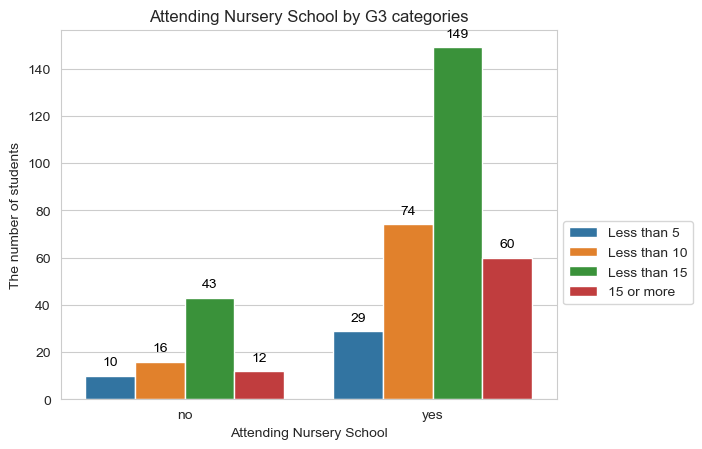

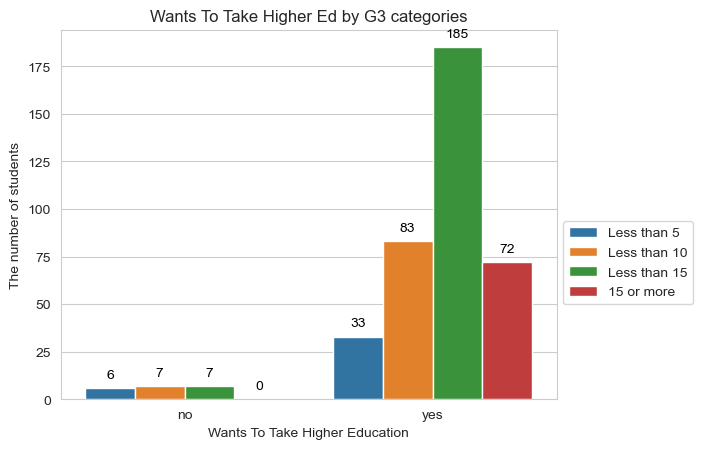

In [38]:
# Checking The Attending Nursery School Column
sns.countplot(hue='G3_category', x='Attending Nursery School', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Attending Nursery School')
plt.ylabel('The number of students')
plt.title('Attending Nursery School by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()
# Checking The Wants To Take Higher Ed Column
sns.countplot(hue='G3_category', x='Wants To Take Higher Ed', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Wants To Take Higher Education')
plt.ylabel('The number of students')
plt.title('Wants To Take Higher Ed by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()


The distribution structure of students across G3 categories appears quite similar for those who want and those who do not want to attend nursery school. This suggests that the desire to attend nursery school does not have a significant impact on students' final grades, as both groups show similar grade distributions.

However, a notable difference emerges when considering students who want to take higher education versus those who do not. Students who express a desire to pursue higher education achieve better grades overall.

These findings suggest a strong positive correlation between the desire for higher education and academic achievement. Students who express a willingness to pursue higher education tend to perform better academically and achieve higher final grades.

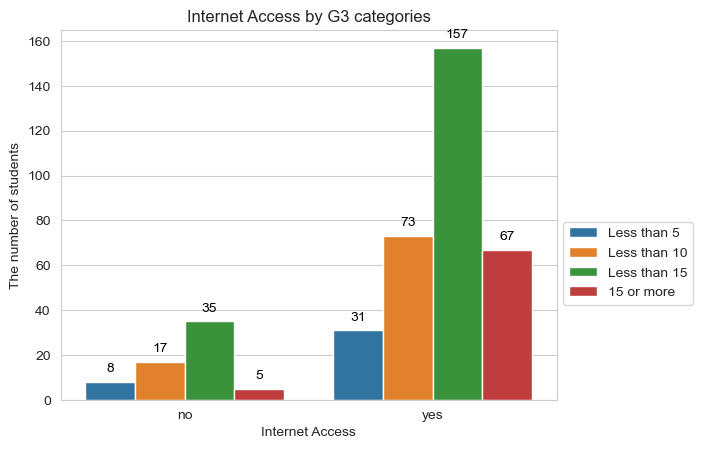

In [39]:
# Checking The Internet Access Column
sns.countplot(hue='G3_category', x='Internet Access', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Internet Access')
plt.ylabel('The number of students')
plt.title('Internet Access by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The distribution structure of students across the G3 categories appears quite similar for both both those with and without access to the Internet.

The data does not establish a direct causal relationship between access to internet and grades. 

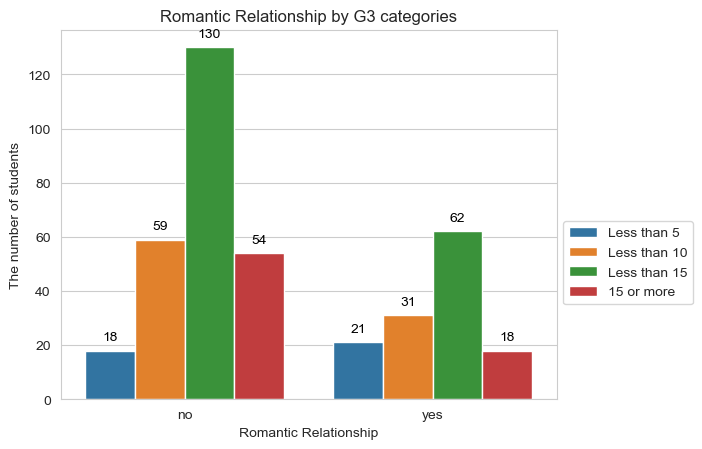

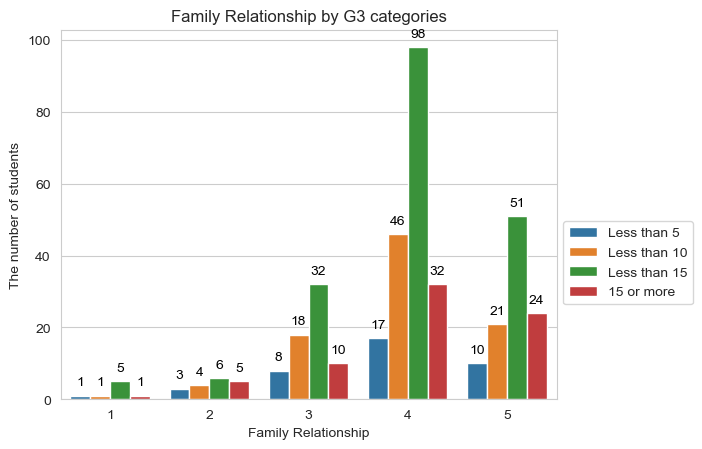

In [40]:
# Checking The Romantic Relationship Column
sns.countplot(hue='G3_category', x='Romantic Relationship', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Romantic Relationship')
plt.ylabel('The number of students')
plt.title('Romantic Relationship by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()
# Checking The Family Relationship Column
sns.countplot(hue='G3_category', x='Family Relationship', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Family Relationship')
plt.ylabel('The number of students')
plt.title('Family Relationship by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The distribution structure of students across G3 categories is generally similar for students with and without romantic relationships, except for the "Less than 5" grade category, where the number of students with a romantic relationship is slightly higher compared to those without.

This observation implies that romantic relationships might not have a significant impact on students' overall academic performance, as both groups show similar grade distributions. 

On the other hand, the data clearly indicates that the quality of family relationships does have an impact on student grades, particularly for the "15 or more" grade category. As the quality of family relationships improves, the number of students achieving the highest grades (15 or more) increases noticeably. This finding suggests that positive family relationships may contribute to better academic performance for students.

In conclusion, the data indicates that romantic relationships might not have a substantial impact on student grades, while the quality of family relationships appears to be positively correlated with higher academic achievement.

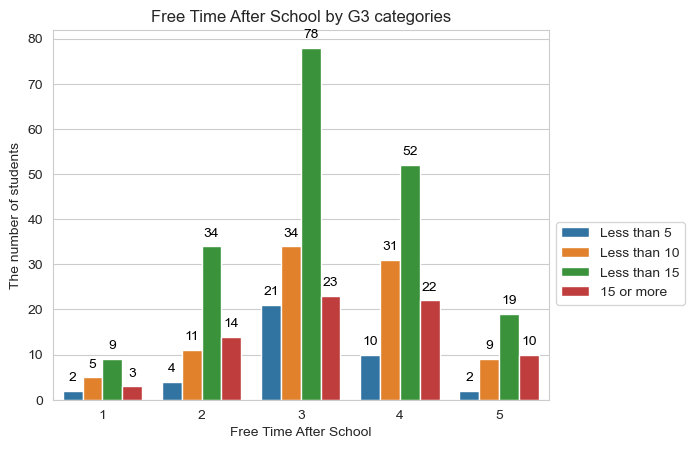

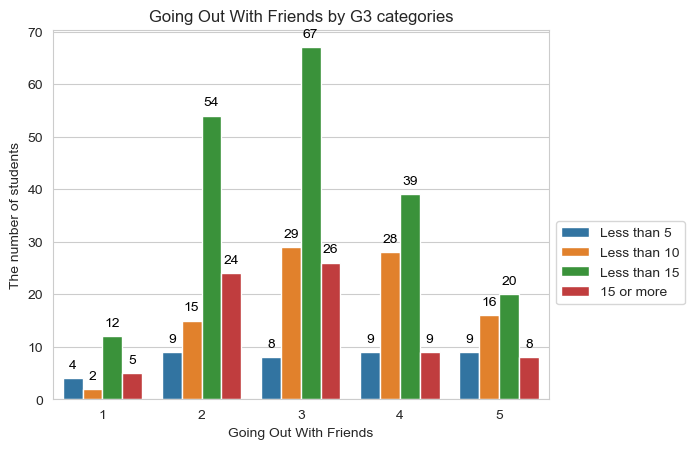

In [41]:
# Checking The Free Time After School Column
sns.countplot(hue='G3_category', x='Free Time After School', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Free Time After School')
plt.ylabel('The number of students')
plt.title('Free Time After School by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()
# Checking The Going Out With Friends Column
sns.countplot(hue='G3_category', x='Going Out With Friends', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Going Out With Friends')
plt.ylabel('The number of students')
plt.title('Going Out With Friends by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Free time after school (numeric: from 1 - very low to 5 - very high)

Going out with friends (numeric: from 1 - very low to 5 - very high) 

The distribution of students across the G3 categories appears quite similar among different ranges of free time after school, suggesting that the amount of free time alone may not significantly influence grades. This similarity is understandable since the key difference likely lies in how students choose to spend their free time. What students do during their free time may be the determining factor rather than the quantity of free time they have.

However, the distribution structure of students across G3 categories differs significantly among various ranges of going out with friends. Students who spend less time going out with friends tend to be more represented in the "less than 15" and "15 or more" grade categories, and they are more likely to achieve excellent grades (15 or more). On the contrary, students who spend more time out with friends (levels 3, 4, and 5) are more represented in the "less than 5" and "less than 10" grade categories. This observation indicates a negative correlation between going out with friends and grades. It suggests that as students spend more time going with friends, their grades tend to decrease.

In summary, the data points to  the amount of free time after school may not be the decisive factor, how students spend that time might play a crucial role in their academic performance. Conversely, more significant time spent out with friends seems to negatively impact students' grades.

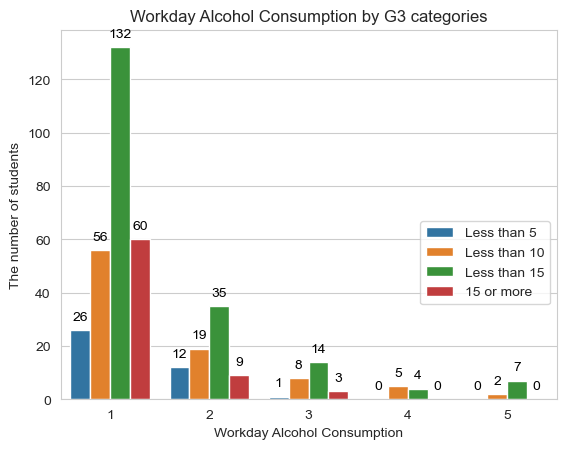

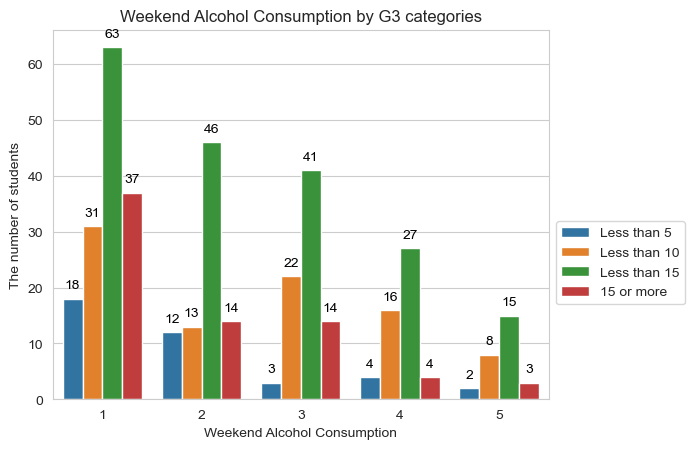

In [42]:
# Checking TheWorkday Alcohol Consumption Column
sns.countplot(hue='G3_category', x='Workday Alcohol Consumption', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Workday Alcohol Consumption')
plt.ylabel('The number of students')
plt.title('Workday Alcohol Consumption by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()
# Checking The Weekend Alcohol ConsumptionColumn
sns.countplot(hue='G3_category', x='Weekend Alcohol Consumption', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('The number of students')
plt.title('Weekend Alcohol Consumption by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

 The majority of students have a very low alcohol consumption during workdays.
 
Students who report having very low alcohol consumption on workdays and weekends are more representative in the "less than 15" and "15 or more" grade categories. This observation suggests a correlation between minimal alcohol intake and academic achievement.

A more notable pattern emerges from the weekend alcohol consumption data. As alcohol consumption during weekends increases, the number of students achieving a final grade of "15 or more" decreases significantly. This observation indicates that weekend alcohol consumption has a noticeable negative influence on students' academic performance. It appears that higher alcohol consumption during weekends is associated with a decline in final grades.

In summary, the data strongly suggests that alcohol consumption, especially during weekends, has an impact on students' achieved grades. Students with minimal alcohol intake during workdays and weekends tend to perform better academically, while increased alcohol consumption during weekends is linked to a decrease in higher grade categories.

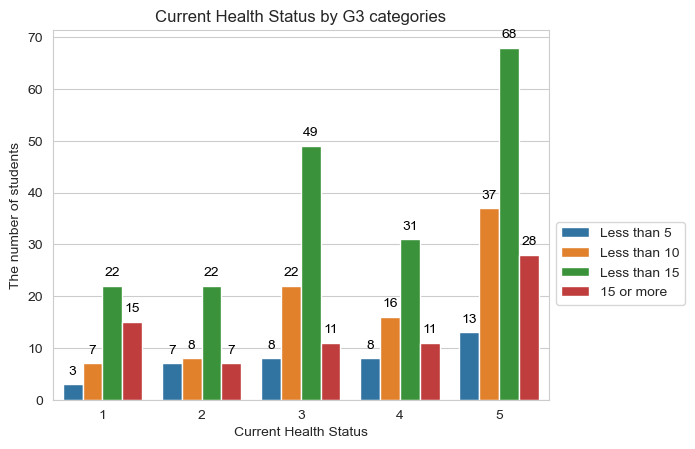

In [43]:
# Checking The Current Health Status Column
sns.countplot(hue='G3_category', x='Current Health Status', data=mat_df)
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel('Current Health Status')
plt.ylabel('The number of students')
plt.title('Current Health Status by G3 categories')
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

The visualization shows the distribution of students in various health status groups for each final grade category. While it doesn't directly depict the relationship between health status and grades.

For example, it appears that a higher proportion of students with health 5 (very good health) tend to have higher final grades (15 or more), while a higher proportion of students with health 1 (very poor health) are more prevalent In the lower final grade categories (less than 5 and less than 10).

Therefore, we cannot say that there is a causal relationship between the achieved grade and the state of health.

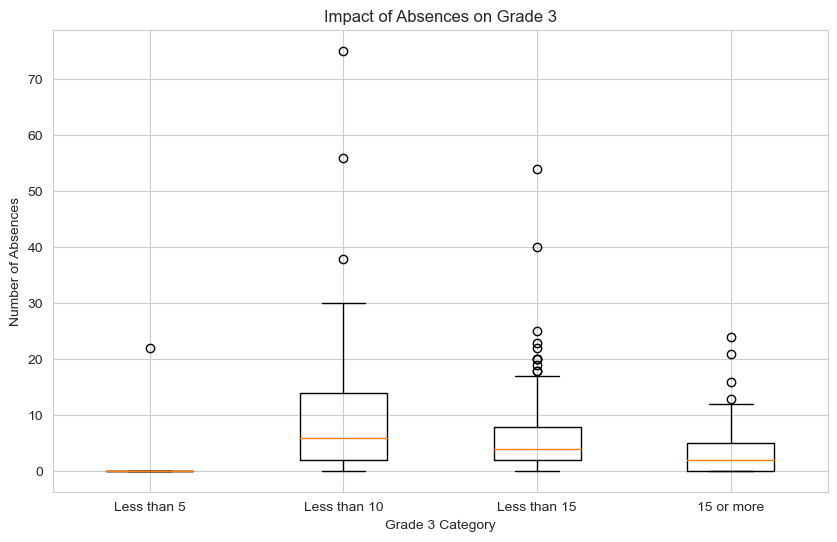

In [44]:
# Checking The Number of School Absences Column
grade_categories = ['Less than 5', 'Less than 10', 'Less than 15', '15 or more']
# Create a new column 'grade_category' based on the values in 'grade_3'
def categorize_grade(grade):
    if grade < 5:
        return grade_categories[0]
    elif grade < 10:
        return grade_categories[1]
    elif grade < 15:
        return grade_categories[2]
    else:
        return grade_categories[3]

mat_df['grade_category'] = mat_df['G3'].apply(categorize_grade)
plt.figure(figsize=(10, 6))
plt.boxplot([mat_df[mat_df['grade_category'] == category]['Number of School Absences'] for category in grade_categories],
            labels=grade_categories)
plt.xlabel('Grade 3 Category')
plt.ylabel('Number of Absences')
plt.title('Impact of Absences on Grade 3')
plt.show()

The orange line at y=0 for the "less than 5" category indicates that all students in this category had no school absences. This observation suggests that the number of absences does not seem to be a contributing factor for students in this particular grade 3 category. Since all students have zero absences, we cannot establish any relationship between absences and grades for this group.

On the other hand, for students in the "5 or more" grade 3 category, we can draw a conclusion that a decrease in the number of absences is associated with an increase in grades. This conclusion is supported by the fact that the median number of absences for each grade group decreases as the grade category increases.

** Overall

Students who have a good grade demonstrate a positive correlation with certain factors in their lives. They tend to have parents with higher levels of education, indicating a possible influence of an educationally supportive environment. They also manage their time effectively, allocating more hours to study, and have fewer past class failures, suggesting strong academic commitment and resilience. Moreover, students with good grades are more likely to attend higher education, indicating a strong motivation to pursue further studies. Additionally, they have positive family relationships and are less likely to engage in risky behaviors, such as excessive alcohol consumption or frequent absences. These students may prioritize their academic goals, make use of available support systems, and strike a balance between social life and studies. Overall, students with good grades display a combination of dedication, discipline, and a supportive educational environment, contributing to their academic success.

C:\Users\X1\AppData\Local\Temp\ipykernel_15196\221276591.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mask = np.triu(mat_df.corr())
C:\Users\X1\AppData\Local\Temp\ipykernel_15196\221276591.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  h_map = sns.heatmap(mat_df.corr(), mask=corr_mask, annot=True, cmap='Blues') # "annot" is set to True so that the correlation coefficients are displayed on the heatmap


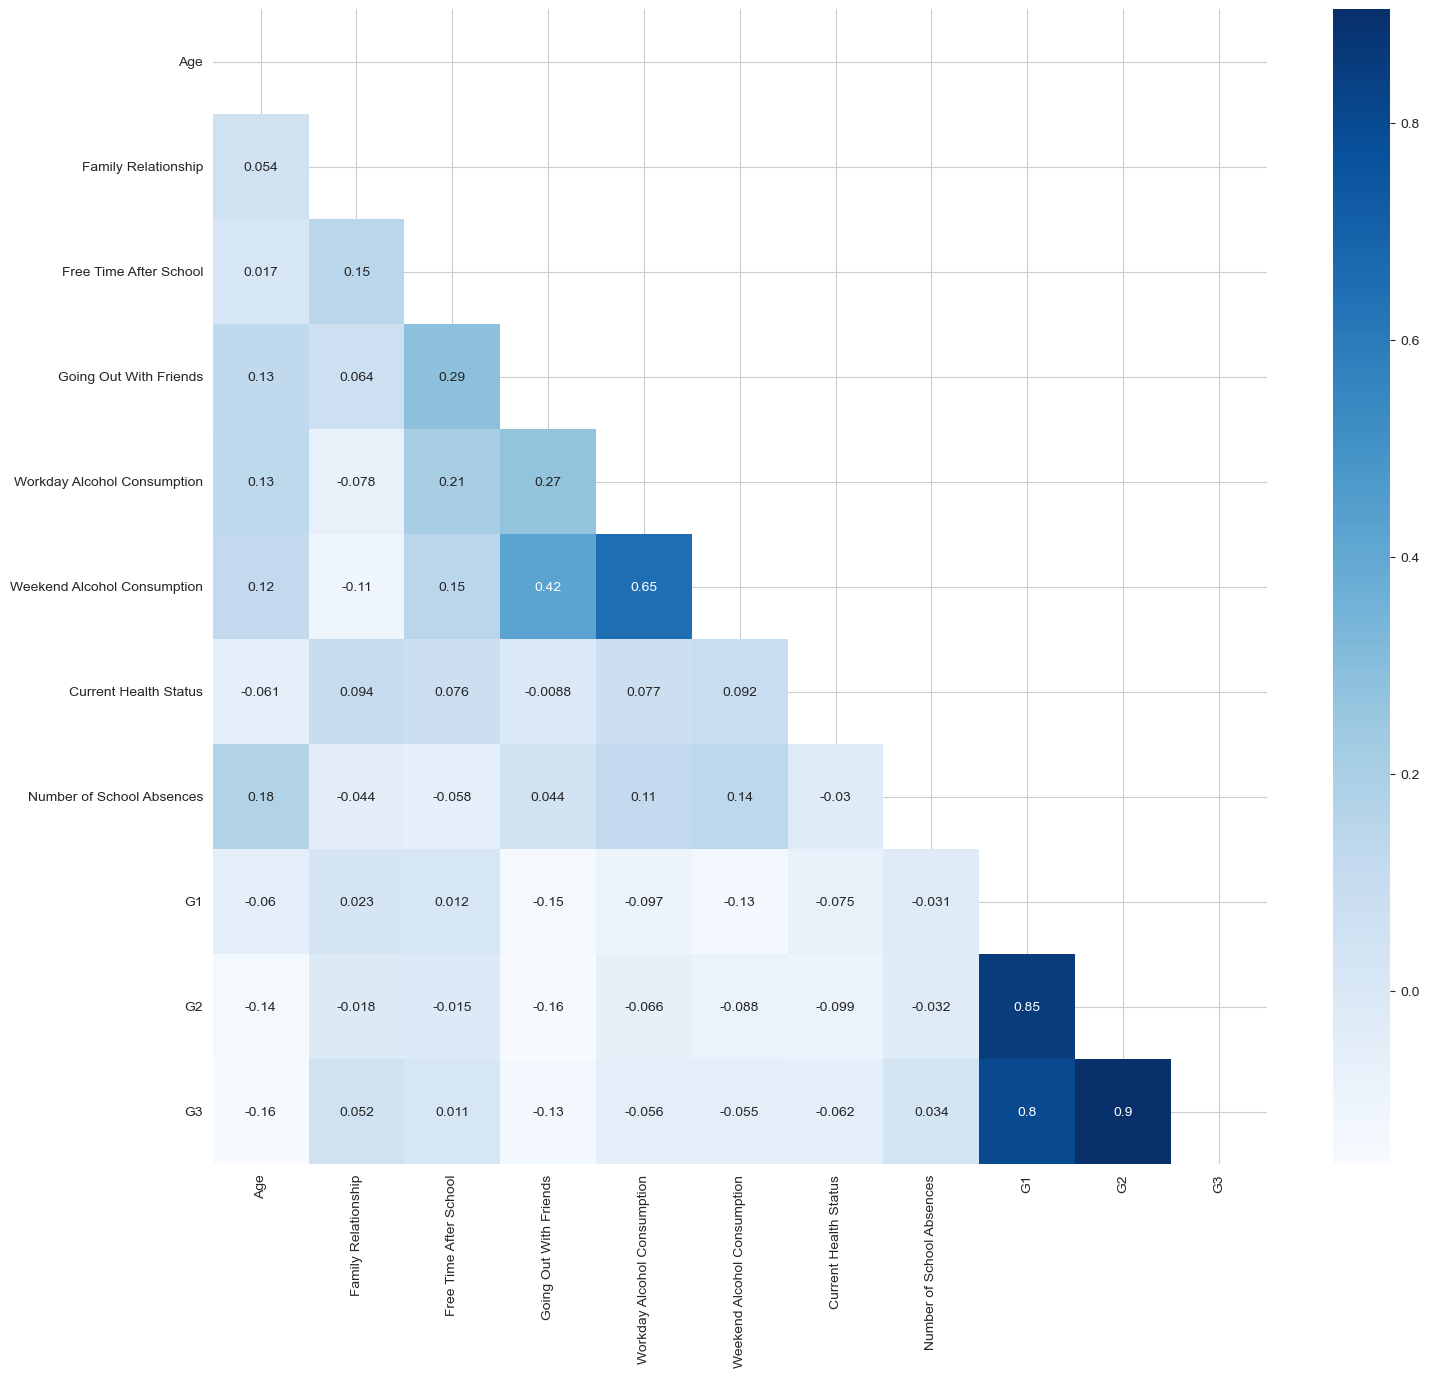

In [45]:
# The correlation between two columns
plt.figure(figsize=(17, 15))
corr_mask = np.triu(mat_df.corr())
h_map = sns.heatmap(mat_df.corr(), mask=corr_mask, annot=True, cmap='Blues') # "annot" is set to True so that the correlation coefficients are displayed on the heatmap
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

From the correlation matrix, we remark that the correlations between G3 (output) and all columns are low (0.052, 0.011, -0.13, -0.055, 0.062, 0.034) except for G1 and G2, which are 0.8 and 0.9, respectively. This means that G3 is strongly correlated with G1 and G2, but not correlated with the other columns.

The correlations between G3 and the other columns are all very low, which means that there is very little relationship between them. This suggests that G3 is not influenced by the other columns,

The correlations between G3 and G1 and G2 are very high, which means that there is a strong relationship between them. This suggests that G3 is strongly influenced by G1 and G2.

Part 3: Data Modeling (Predition of the final grade (G3))

1/ Build the regression model

Based on the correlation matrix data, it was observed that Grade 3 (G3) is most influenced by G1 and G2. Therefore, the decision is made to construct a linear regression model using G1 and G2 as predictors to predict G3.

In [46]:
# build the linear regression model
X = mat_df[["G1", "G2"]]
Y = mat_df["G3"]
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

2/ Run the data through the regression model

After building the regression model, we run our data through it to predict the Grade G3. The predicted values are stored in a list called prediction.

In [47]:
# Run the data into the Model and store the output in a list called prediction 
prediction = []
for i in range(0, 394):
    student_data = mat_df[["G1", "G2"]].iloc[i]
    student_data = student_data.to_numpy()
    student_data = student_data.reshape(1, -1)
    prediction.append(model.predict(student_data))

C:\Users\X1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\X1\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature n

The prediction list will contain the predicted Grade G3 values for each corresponding student's G1 and G2 scores in the dataset.

In [48]:
# Print the model output
print(prediction)

[array([3.85845205]), array([7.12793314]), array([14.28916092]), array([8.94459894]), array([15.27527702]), array([11.85022953]), array([4.01401844]), array([18.38919172]), array([15.11971062]), array([7.59463234]), array([11.53909673]), array([14.13359453]), array([9.56686453]), array([16.10582672]), array([14.13359453]), array([13.97802813]), array([9.25573174]), array([4.01401844]), array([9.25573174]), array([13.97802813]), array([14.80857783]), array([15.27527702]), array([12.99191203]), array([8.58074844]), array([7.95848284]), array([11.85022953]), array([16.26139312]), array([10.70854703]), array([11.53909673]), array([10.39741423]), array([16.57252592]), array([16.57252592]), array([9.25573174]), array([13.82246173]), array([6.29738344]), array([16.26139312]), array([16.26139312]), array([11.85022953]), array([13.14747843]), array([9.10016534]), array([11.85022953]), array([18.85589092]), array([7.28349954]), array([9.56686453]), array([7.28349954]), array([11.69466313]), arra

In [49]:
print(type(prediction))
print(len(prediction))

<class 'list'>
394


In [50]:
# Change dimention of prediction list to 1
prediction = [item for sublist in prediction for item in sublist] #Flatten the prediction list

In [51]:
print(prediction)

[3.858452045450681, 7.127933139412315, 14.289160924604417, 8.944598936979919, 15.275277023046822, 11.85022952976798, 4.01401844476789, 18.389191717691247, 15.119710623729613, 7.59463233736394, 11.539096731133563, 14.13359452528721, 9.56686453424875, 16.10582672217202, 14.13359452528721, 13.97802812597, 9.255731735614335, 4.01401844476789, 9.255731735614335, 13.97802812597, 14.808577825095199, 15.275277023046822, 12.991912027527594, 8.580748435806345, 7.958482838537513, 11.85022952976798, 16.261393121489228, 10.708547032008367, 11.539096731133563, 10.39741423337395, 16.572525920123645, 16.572525920123645, 9.255731735614335, 13.822461726652794, 6.297383440287119, 16.261393121489228, 16.261393121489228, 11.85022952976798, 13.147478426844803, 9.100165336297126, 11.85022952976798, 18.85589091564287, 7.283499538729524, 9.56686453424875, 7.283499538729524, 11.694663130450772, 19.84200701408528, 15.275277023046822, 6.141817040969911, 12.836345628210385, 12.680779228893178, 10.708547032008367, 

3- Model Evaluation

a/ Plot the model output

In [52]:
# Create a data frame that stores the model output and the actual values of the final score (G3)
df_evotuation = pd.DataFrame({"G3": mat_df["G3"], "predicted_G3": prediction})

In [53]:
df_evotuation.head(10)

,G3,predicted_G3
0,6.0,3.858452
1,10.0,7.127933
2,15.0,14.289161
3,10.0,8.944599
4,15.0,15.275277
5,11.0,11.850230
6,6.0,4.014018
7,19.0,18.389192
8,15.0,15.119711
9,9.0,7.594632


In [54]:
df_evotuation.describe()

,G3,predicted_G3
count,394.000000,394.000000
mean,10.426396,10.426396
std,4.581844,4.153845
min,0.000000,-1.227695
25%,8.000000,8.114049
50%,11.000000,10.552981
75%,14.000000,13.108587
max,20.000000,19.842007


The output of the describe() function shows that the actual values and the predicted values are very similar. The mean, standard deviation, minimum, 25th percentile, 50th percentile, and 75th percentile are all very close for both sets of values. This shows that the predictive model is performing well and is able to accurately predict the actual values.

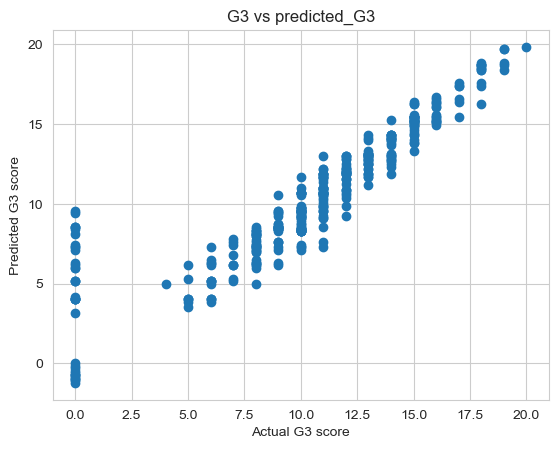

In [51]:
# Create a scatter plot of the G3 and predicted_G3 columns
plt.scatter(df_evotuation["G3"], df_evotuation["predicted_G3"])
plt.title("G3 vs predicted_G3")
plt.xlabel("Actual G3 score")
plt.ylabel("Predicted G3 score")
plt.show()

The scatter plot shows the relationship between the actual G3 scores and the predicted G3 scores. 
The point is closer to an aligned line passing through the point (0,0), This indicates that the model is making accurate predictions.

b/ MAE , RMSE and R-squared

Mean absolute error (MAE): The MAE is the average of the absolute difference between the predicted G3 scores and the actual G3 scores. A low MAE indicates that the model is making accurate predictions.

Root mean squared error (RMSE): The RMSE is the square root of the average of the squared difference between the predicted G3 scores and the actual G3 scores. A low RMSE also indicates that the model is making accurate predictions.

R-squared: The R-squared value is a measure of how well the model fits the data. A high R-squared value indicates that the model is a good fit for the data.

In [55]:
# Calculate the Mean absolute error
mae = np.mean(np.abs(df_evotuation["G3"] - df_evotuation["predicted_G3"]))
print(mae)

1.1395077795415551


In [56]:
# Calculate the Root mean squared error
rmse = np.sqrt(np.mean((df_evotuation["G3"] - df_evotuation["predicted_G3"])**2))
print(rmse)

1.9311590168407824


In [57]:
# Calculate the R-squared value
r_squared = np.corrcoef(df_evotuation["G3"], df_evotuation["predicted_G3"])[0, 1]**2
print(r_squared)

0.8219019737241442


MAE: The MAE is 1.1395077795415551. This means that the average difference between the predicted G3 scores and the actual G3 scores is 1.1395077795415551 points.

RMSE: The RMSE is 1.9311590168407824. This means that the square root of the average squared difference between the predicted G3 scores and the actual G3 scores is 1.9311590168407824 points.

R-squared: The R-squared value is 0.8219019737241442. This means that the model explains 82.19019737241442% of the variance in the G3 scores.

In general, a lower MAE and RMSE indicate that the model is making more accurate predictions. A higher R-squared value also indicates that the model is making more accurate predictions.

Based on these values, we can conclude that the model is making relatively accurate predictions. The MAE and RMSE values are both relatively low, and the R-squared value is relatively high.

Part 4: Real-world application for Predicting Student Performance application

One specific real-world application for this task could be an educational institution's early warning system. By utilizing the available student past grades, the system could predict the final grades of students at an early stage in the academic year. This information can be valuable for identifying students who are at risk of underperforming or failing the course. 

So, The institution can then intervene by providing additional support or resources to help these students improve their academic performance and increase their chances of success.

The predictive model can also be used to give personalized feedback and guidance for students. By understanding the factors that contribute to a student's success, such as study time, family support, or commitment, the  institution can make recommendations tailored to each student according to their situation.

For example, if a student is spending insufficient time studying, the school can suggest him to increase their study hours.

Overall, this predictive task and its real-world application aim to improve student performance, enhance educational interventions, and provide personalized support to students in order to maximize their learning outcomes.
